# References
1. Tennis Scoring System: https://en.wikipedia.org/wiki/Tennis_scoring_system Retrieved: 18/04/24
2. ATP Ranking: https://www.atptour.com/en/rankings/singles Retrieved: 18/04/24
3. Introduction to Modeling and Simulation with Matlab and Python. Steve I. Gordon and Brian Guifoos. Figure 1.2 Major steps in the modeling process. Page 11

# Using Python for Mathematical Modelling: An Application

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/njc-cz2-2021/Materials/blob/main/Notes/Chapter_01_Data_Types.ipynb)

# 0. Mathematical Modelling

Insert Mathematical Modelling discussion here (?) Muran suggested to include Singapore Math Modelling framework.

# 1. The Deuce Problem
A tennis game consists of a sequence of points played with the same player serving. A game is won by the first side to win at least four points and have a margin of two points or more over their opponent.

When each player has won three points, the score is called as "deuce". From that point on in the game, whenever the score is tied, it is described as "deuce" regardless of how many points have been played.

In standard play, scoring beyond a "deuce" score, in which the players have scored three points each, requires that one player must get two points ahead in order to win the game. This type of tennis scoring is known as "advantage scoring" (or "ads"). The side that wins the next point after deuce is said to have the advantage. If they lose the next point, the score is again deuce, since the score is tied. If the side with the advantage wins the next point, that side has won the game, since they have a lead of two points. When the server is the player with the advantage, the score may be called as "advantage in".

> **Problem:**
>
> If Novak Djokovic (ATP Rank 1) plays Jannik Sinner (ATP Rank 2) in a game starting at a deuce, who will win the game?

INSERT IMAGE HERE

## 1.1 Analyzing the Problem
We can restate the description of winning a game from a deuce situation in the **Structured English** format.

```
00 DJOKOVIC WINS GAME FROM DEUCE
01 IF DJOKOVIC beats SINNER THEN      #FIRST POINT WON BY DJOKOVIC
02    IF DJOKOVIC beats SINNER THEN   #TWO CONSECUTIVE WIN BY DJOKOVIC
03      DJOKOVIC wins
04    ELSE                            #DJOKOVIC LOSES SECOND POINT
05      restarts from deuce
06    ENDIF
07 ELSE                               #DJOKOVIC LOSES FIRST POINT
08    IF DJOKOVIC beats SINNER THEN   #DJOKOVIC WINS SECOND POINT
09      restarts from deuce
10    ELSE                            #TWO CONSECUTIVE LOSSES BY DJOKOVIC
11      DJOKOVIC loses
12 ENDIF
```

The objective is to **predict the winner** between Djokovic and Sinner.

## 1.2 Using Diagram for Analysis

<center>

<img src="./img/tree_diagram.drawio.png\" width="500" align="center">

Fig 1. State Dragram for the Deuce Situation

</center>

# 2. A Naive Solution

## 2.1 Making Assumptions
- It's too complicated. Let's just toss a coin.
- If heads, Djokovic wins the game. Otherwise, Sinner wins.

## 2.2 Implement the Computer Model

In [ ]:
def coin_toss():
  import random
  # let 0 represents tail and 1 represents head
  return random.randint(0,1)

def djokovic_wins_the_game():
  coin = coin_toss()
  if coin == 1:
    return True
  else:
    return False


## 2.3 Model Verification I
- Model grossly oversimplify things. Result is dependent on a single toss.
- Possible modification. What if each individual point is determined by an individual toss?
- Go back to 2.1 and continue with 2.2


In [ ]:
def djokovic_wins_a_point():
  coin = coin_toss()
  if coin == 1:
    return True
  else:
    return False

# implement the code based on the structured english
def djokovic_wins_the_game():
  if djokovic_wins_a_point():
    if djokovic_wins_a_point():
      return True
    else:
      return djokovic_wins_the_game()
  else:
    if djokovic_wins_a_point():
      return djokovic_wins_the_game()
    else:
      return False


True
False
False
True
True
False
False
False
False
True


## 2.4 Model Verification II
- The coin toss is (assumed) going to give 50% head and 50% tails on average.
- Since tennis players have differing ability, perhaps the outcome of a point shouldn't be that balanced.
- Possible modification. What if the outcome of the point has some imbalance in the number of wins or losses obtained on average. In other words, what if the probability of winning a point by Djokovic is the value $p$ where $0 \leq p \leq 1$?
- Using Probability Model

Go back to 2.1 and continue with 2.2

In [ ]:
def djokovic_wins_a_point(p):
  import random
  if random.random() < p:
    return True
  else:
    return False

# implement the code based on the structured english
def djokovic_wins_the_game(p):
  if djokovic_wins_a_point(p):
    if djokovic_wins_a_point(p):
      return True
    else:
      return djokovic_wins_the_game(p)
  else:
    if djokovic_wins_a_point(p):
      return djokovic_wins_the_game(p)
    else:
      return False


## 2.5 Model Validation
- Get some data
- According to [Tennis Statistics](https://www.ultimatetennisstatistics.com/headToHead?playerId1=4920&playerId2=50810&tab=matches&outcome=played#matchStats-182171Return), Djokovic played Sinner for the first time in the tour in 2021, where Djokovic won $72$ out of $130$ points. So, we assume  $p=0.554$ as an approximation
- Simulate 1000 deuce games to find approximation of the probability of Djokovic winning the game
- Now, we have probably a better prediction

In [ ]:
win_count = 0
no_of_games = 100000

for _ in range(no_of_games):
  if djokovic_wins_the_game(0.554):
    win_count += 1

print(win_count/no_of_games)

0.60731


## 2.6 Caveat
- $0.554$ is from a single match and need not be representative from points in a deuce game

# 3. Return to the Diagram

## 3.1 Probability Tree Diagram
- So, $p$ is the probability of Djokovic winning a point

<center>

<img src="./img/probability_tree.drawio.png\" width="500" align="center">

Fig 2. Probability Tree Dragram for the Deuce Situation

</center>


## 3.2 The Recursive Equation

Consider the following events
- $D$ : Djokovic wins the game from deuce
- $W_i$ : Djokovic wins the $i$th point from deuce
- $L_i$ : Djokovic loses the $i$th point from deuce

Based on the probability tree, we have the following equation

$$\begin{align}
P(D)	&=P\left(W_{1}W_{2}\right)+P\left(W_{1}L_{2}D\right)+P\left(L_{1}W_{2}D\right) \\
P\left(D\right)	&=p\cdot p+p\left(1-p\right)P\left(D\right)+\left(1-p\right)pP\left(D\right)\\
P\left(D\right)\left(1-2p\left(1-p\right)\right)	&=p^{2}\\
P\left(D\right)	&=\frac{p^{2}}{1-2p\left(1-p\right)}
\end{align}
$$

In [ ]:
def prob_winning(p):
  return p**2/(1-2*p*(1-p))

p = 0.554

print(prob_winning(p))

0.6067548118742982


Actually, we don't have to solve the equation obtained manually. Python can solve it for us 😏

In [ ]:
from sympy import *

p, p_D = symbols('p,p_D')

init_printing()

display(solve(Eq(p_D,p**2+p*(1-p)*p_D+(1-p)*p*p_D)))

⎡⎧            2      ⎫⎤
⎢⎪           p       ⎪⎥
⎢⎨p_D: ──────────────⎬⎥
⎢⎪        2          ⎪⎥
⎣⎩     2⋅p  - 2⋅p + 1⎭⎦

## 3.3 Probability of Djokovic Winning
- We plot the graph if the function obtained above


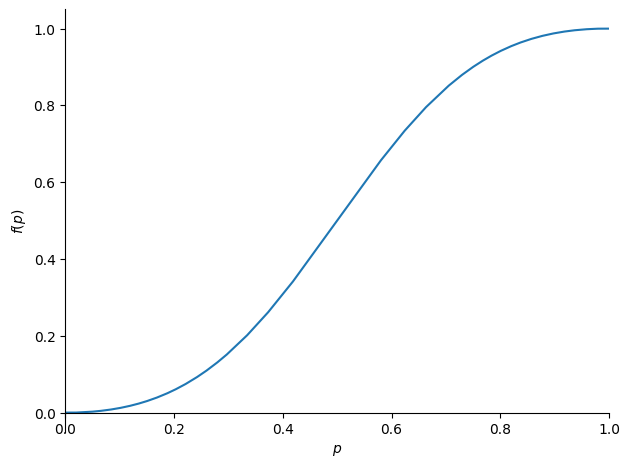

In [ ]:
from sympy import symbols
from sympy.plotting import plot
p = symbols('p')
p1 = plot(p**2/(1-2*p*(1-p)), show=False, xlim = (0,1))
p1.show()

- Observe that
  - graph has an inflection point at $p=0.5$
  - graph is concave upwards on $(0,0.5)$
  - graph is convave downwards on $(0.5,1)$

This implies that the player that have the higher probability of winning a point will have an advantage in winning the game from deuce.

## 3.3 OK, I'm actually cheating
- the equation below holds because I'm assuming that winnning a prior point has no effect on the probability of the winning following point, i.e the events are independent 😆

$$\begin{align}
P\left(D\right)	&=p^{2}+p\left(1-p\right)P\left(D\right)+\left(1-p\right)pP\left(D\right)\\
\end{align}
$$

# 4. Improving the Model
- what if we want to consider the effect of winning/losing points towards the subsequent probabilities? Let us look at the probability tree again.

<center>

<img src="./img/probability_tree_conditional.drawio.png\" width="500" align="center">

Fig 1. State Dragram for the Deuce Situation

</center>

### 4.1 Combining into a function

In [31]:
def approximate_winning_probability(no_of_games):
  from itertools import starmap

  win_count = 0

  def djokovic_wins_the_game(p_w, p_ww, p_lw):

    def djokovic_wins_a_point(p):
      import random
      if random.random() < p:
        return True
      else:
        return False

    if djokovic_wins_a_point(p_w):
      if djokovic_wins_a_point(p_ww):
        return True
      else:
        return djokovic_wins_the_game(p_w, p_ww, p_lw)
    else:
      if djokovic_wins_a_point(p_lw):
        return djokovic_wins_the_game(p_w, p_ww, p_lw)
      else:
        return False

  p_w  =  0.554
  p_ww =  0.554 + 0.1
  p_lw =  0.554 - 0.1

  param = [(p_w, p_ww, p_lw)]

  for _ in range(no_of_games):
    if list(starmap(djokovic_wins_the_game, param))[0]:
      win_count += 1

  return win_count/no_of_games

approximate_winning_probability(10000)

0.594

## 4.2 Now with more params!
- Better, but does the probabilities in the parameter need to be predetermined?
- Can we quantify some player attributes and make them relevant in the computation?
  - For example, both Djokovic and Sinner has some attributes like strength, agility and stamina which could determine how the probability is computed
  - We could also have another attribute luck to further influence the outcome

### 4.3 Submodel for Winning Probability
Let $x_i$, $y_i$, $z_i$ be the strength, agility and stamina values of Player $i$. We define the *player score* $S_i$ of Player $i$ to be simply the sum of the values, i.e. $$S(x_i,y_i,z_i)= x_i+y_i+z_i.$$

Together with the logistic function, we can define the probability of player $i$ defeating player $j$ as $$P(\text{Player i} > \text{Player j}) = \frac{1}{1+e^{S_j-S_i}}$$



### 4.4 OK. ChatGPT. Help me out.

- Novak Djokovic
  - Strength (STR): Djokovic isn't known primarily for his sheer power; instead, he is known for his incredible ability to return and sustain rallies. However, his service and groundstrokes are very effective. We might rate him as: STR: 85/100
  - Agility (AGI): One of Djokovic's defining traits is his exceptional agility. His ability to reach and return shots that most players would miss is unparalleled. AGI: 95/100
  - Stamina (STAM): Djokovic is famous for his endurance and his capability to play intensely long matches without a significant drop in performance. His stamina is likely one of the highest on the tour. STAM: 98/100

- Jannik Sinner
  - Strength (STR): Sinner is known for his powerful groundstrokes, especially his forehand. He can generate significant speed on his shots, which would translate to a high strength rating. STR: 90/100
  - Agility (AGI): While agile, Sinner is not quite at Djokovic’s level but still moves exceptionally well across the court. His agility allows him to maintain a strong offensive and defensive game. AGI: 88/100
  - Stamina (STAM): Sinner is young and fit, capable of enduring long matches, but his experience and ability to manage energy in prolonged contests are still developing compared to Djokovic. STAM: 85/100

In [32]:
class Player:
  def __init__(self, str, agi, stam):
    self.str = str
    self.agi = agi
    self.stam = stam

  def get_player_score(self):
    return self.str + self.agi + self.stam

  def win_probability_against(self, Player):
    import math

    return 1/(1 + math.exp(Player.get_player_score() - self.get_player_score()))

def approximate_winning_probability(no_of_games):
  from itertools import starmap

  win_count = 0

  def djokovic_wins_a_game(p_w, p_ww, p_lw):

    def djokovic_wins_a_point(p):
      import random
      if random.random() < p:
        return True
      else:
        return False

    if djokovic_wins_a_point(p_w):
      if djokovic_wins_a_point(p_ww):
        return True
      else:
        return djokovic_wins_the_game(p_w, p_ww, p_lw)
    else:
      if djokovic_wins_a_point(p_lw):
        return djokovic_wins_the_game(p_w, p_ww, p_lw)
      else:
        return False

  djokovic = Player(85,95,98)
  sinner = Player(90,88,85)
  p_w  =  djokovic.win_probability_against(sinner)

  djokovic = Player(85,95,95)
  sinner = Player(90,88,80)
  p_ww = djokovic.win_probability_against(sinner)

  djokovic = Player(85,95,85)
  sinner = Player(90,88,70)
  p_lw = djokovic.win_probability_against(sinner)

  param = [(p_w, p_ww, p_lw)]

  for _ in range(no_of_games):
    if list(starmap(djokovic_wins_the_game, param))[0]:
      win_count += 1

  return win_count/no_of_games

approximate_winning_probability(10000)

1.0

## 4.3 Djokovic the GOAT
- what went wrong?
  - probability given logistic function is near 1 for Djokovic winning a point

In [5]:
class Player:
  def __init__(self, str, agi, stam):
    self.str = str
    self.agi = agi
    self.stam = stam

  def get_player_score(self):
    return self.str + self.agi + self.stam

  def win_probability_against(self, Player):
    import math

    return 1/(1 + math.exp(Player.get_player_score() - self.get_player_score()))

djokovic = Player(85,95,98)

sinner = Player(90,88,85)

print(djokovic.win_probability_against(sinner))

print(sinner.win_probability_against(djokovic))

0.999999694097773
3.059022269256247e-07


## 4.4 Too Deep Into the Rabbit Hole
1. What we could do to improve the model:
  - Adjust the player score function to maybe $$S(x_i,y_i,z_i)= w_1x_i+w_2y_i+w_3z_i.$$ I.e., we can add weights to each stats
  - use a more generalized logistic function $$P(\text{Player i} > \text{Player j}) = \frac{1}{1+e^{a+b(S_j-S_i)}}$$
  - adjust $w_1, w_2, w_3, a$ and $b$ such that it aligns better with real-world statistics
2. Repeat until we feel it's satisfactory.

# 5. Model Timeline
1. Single Fair Coin toss to determine outcome of the game
2. Multiple Fair Coin tosses to determine outcome of the game
3. Using real-world statistics to use as probability of winning
4. Using conditional probabilities in different scenario
5. Modelling probability of winning with logistic function and OOP

# 6. Final Word: What Can Python Offer In the Context of Mathematical Modelling
1. Relatively easy implementation of the mathematical ideas due to similar syntax
2. Simulation Capabilities with or without OOP
    - Section 3.3.1 without OOP
    - Section 3.4 with OOP
3. Computer Algebraic System to solve algebraic equations with `sympy` module
    - Section 3.3
4. Drawing Diagram and Plots

# Further Explorations
- predict the outcome of the game from `0-0`
- predict the winner from a tournament of $n$ players

## 1.1 Restating the Problem
1. Analyze the Problem and define Objectives of for Model
2. Create a conceptual model of the system
3. Make simplifying assumptioins
4. Choose variables, define relationships, define equations and functions
5. Implement the computer model
6. Interpret results, Verify and Refine model. Verifying model means checking if correctly implemented and free of errors.Repeat from 4
7. Validate Model, Validation is the process of checking whether your simulation model is a good representation of the real system
8. Analysis and Reporting
9. Maintain and refined the model. Repeat from 4
